In [131]:
from matplotlib import pyplot as plt
import pandas as pd

#### Estadistica de sobrevivientes y muertos en un barco

In [132]:
df = pd.DataFrame()
df = pd.read_csv("barco.csv")
#df["Amount"] = sorted(df["Amount"])
#df["Amount"] = df["Amount"].astype(str)
df.head()


,Class,Age,Gender,Survived,Amount
0,1st,Adult,Male,Yes,57
1,1st,Adult,Male,No,118
2,1st,Child,Male,Yes,5
3,1st,Child,Male,No,0
4,1st,Adult,Female,Yes,140


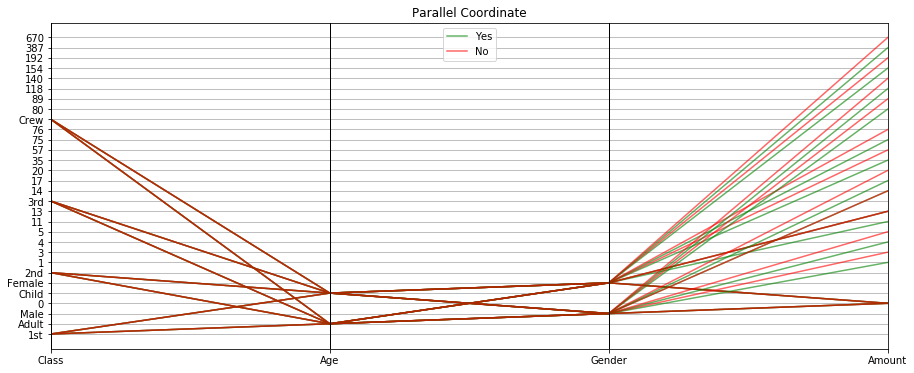

In [6]:
plt.figure(figsize=(15,6));
pd.plotting.parallel_coordinates(df[["Class", "Age", "Gender", "Survived", "Amount"]]
                                 , "Survived",color=["green", "red"], sort_labels=False
                                 , linestyle="-", alpha=0.6)
plt.title("Parallel Coordinate")
plt.legend(loc=9)
plt.show()

In [133]:
df.head()

,Class,Age,Gender,Survived,Amount
0,1st,Adult,Male,Yes,57
1,1st,Adult,Male,No,118
2,1st,Child,Male,Yes,5
3,1st,Child,Male,No,0
4,1st,Adult,Female,Yes,140


In [134]:
df[df["Gender"] == "Female"]

,Class,Age,Gender,Survived,Amount
4,1st,Adult,Female,Yes,140
5,1st,Adult,Female,No,4
6,1st,Child,Female,Yes,1
7,1st,Child,Female,No,0
12,2nd,Adult,Female,Yes,80
13,2nd,Adult,Female,No,13
14,2nd,Child,Female,Yes,13
15,2nd,Child,Female,No,0
20,3rd,Adult,Female,Yes,76
21,3rd,Adult,Female,No,89


In [135]:
df[df["Gender"] == "Male"]

,Class,Age,Gender,Survived,Amount
0,1st,Adult,Male,Yes,57
1,1st,Adult,Male,No,118
2,1st,Child,Male,Yes,5
3,1st,Child,Male,No,0
8,2nd,Adult,Male,Yes,14
9,2nd,Adult,Male,No,154
10,2nd,Child,Male,Yes,11
11,2nd,Child,Male,No,0
16,3rd,Adult,Male,Yes,75
17,3rd,Adult,Male,No,387


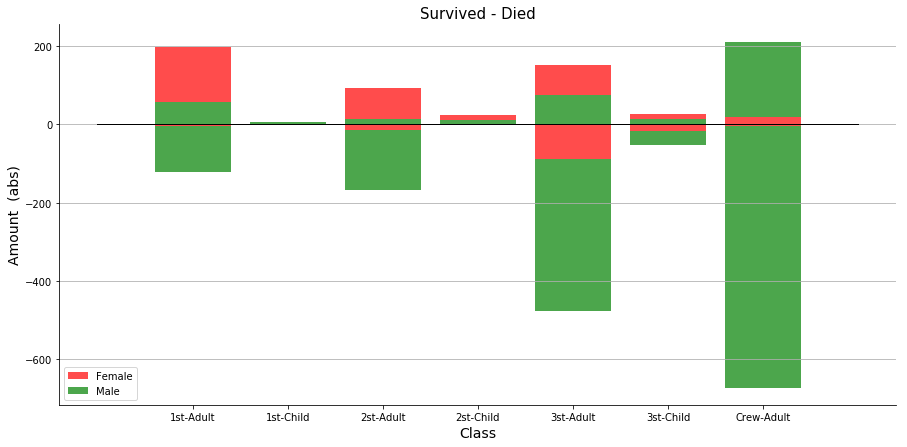

In [136]:
import numpy as np
plt.figure(figsize=(15,7))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#Mujeres
x = [1,1,2,2,3,3,4,4,5,5,6,6,7,7]
#bottom_bar_1
bb_1 = [57,0,0,0,14,0,11,0,75,0,13,0,0,0]

plt.bar(x, height=[140,-4,1,0,80,-13,13,0,76,-89,14,-17,20,-3], color='red',
        linewidth=50, label="Female", alpha=0.7, bottom=bb_1);
#Hombres
#bottom_bar_2
bb_2 = [0,-4,1,0,0,-13,0,0,0,-89,0,-17,20,-3]

plt.bar(x, height=[57,-118,5,0,14,-154,11,0,75,-387,13,-35,192,-670], color='green',
        linewidth=50, label="Male", alpha=0.7, bottom=bb_2);

plt.xticks([1,2,3,4,5,6,7], ["1st-Adult","1st-Child","2st-Adult","2st-Child",
                         "3st-Adult","3st-Child", "Crew-Adult"], rotation=0)

plt.grid(axis='y');
plt.legend(loc="lower left")
plt.title("Survived - Died", size=15)
plt.ylabel("Amount  (abs)", size=14)
plt.xlabel("Class", size=14)
plt.plot(range(int(np.ceil(len(x)/2))+2), np.zeros(int(np.ceil(len(x)/2))+2), color='black',
         alpha=1, linestyle='-',linewidth=1);

In [137]:
print("Survived: ", sum(df[df["Survived"]=="Yes"]["Amount"]))
print("Died: ", sum(df[df["Survived"]=="No"]["Amount"]))

Survived:  711
Died:  1490


In [138]:
print("-------------- Survived --------------------")
print("Male: ",sum(df.loc[df["Gender"]=="Male",:].loc[df["Survived"]=="Yes"]["Amount"]))
print("Female: ",sum(df.loc[df["Gender"]=="Female",:].loc[df["Survived"]=="Yes"]["Amount"]))
print("-------------- Died --------------------")
print("Male: ",sum(df.loc[df["Gender"]=="Male",:].loc[df["Survived"]=="No"]["Amount"]))
print("Female: ",sum(df.loc[df["Gender"]=="Female",:].loc[df["Survived"]=="No"]["Amount"]))

-------------- Survived --------------------
Male:  367
Female:  344
-------------- Died --------------------
Male:  1364
Female:  126


In [286]:
l_a = ('No','Male','Crew',"Adult")
sum(df.loc[df["Gender"]==l_a[1],:].loc[df["Survived"]==l_a[0]].loc[df["Class"]==l_a[2]].loc[df["Age"]==l_a[3]]["Amount"])

670

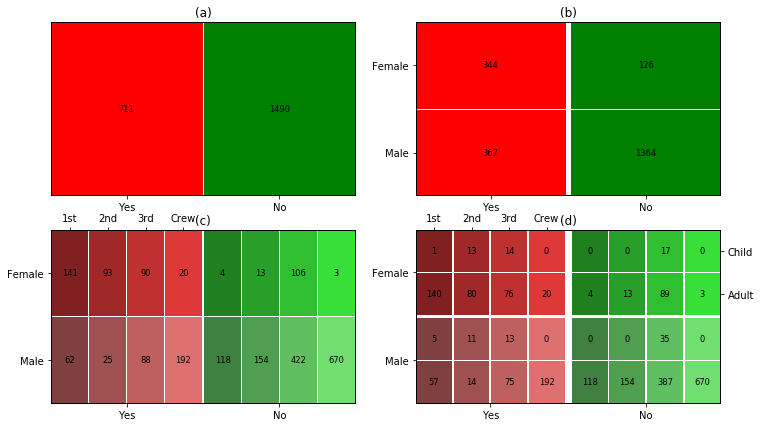

In [287]:
from statsmodels.graphics.mosaicplot import mosaic

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
#Figura A
mosaic(df,["Survived"], title='(a)',
       labelizer=lambda k: {('Yes',):'711', ('No',):'1490'}[k],
      properties=lambda key: {'color': 'g' if 'No' in key else 'r'}, ax=axes[0,0]);

a = mosaic(df,["Survived","Gender"], title='(b)', ax=axes[0,1],
       labelizer=lambda k: {('Yes','Female'):'344', ('No','Female'):'126',
                           ('Yes','Male'):'367', ('No','Male'):'1364'}[k],
          properties=lambda key: {'color': 'g' if 'No' in key else 'r'},
          horizontal=True,gap=0.02);

mosaic(df,["Survived", "Gender", "Class"], title='(c)', ax=axes[1,0],
      labelizer=lambda k: {('Yes','Female','1st'):'141', ('Yes','Female','2nd'):'93',
                           ('Yes','Female','3rd'):'90', ('Yes','Female','Crew'):'20',
                           ('Yes','Male','1st'):'62', ('Yes','Male','2nd'):'25',
                           ('Yes','Male','3rd'):'88', ('Yes','Male','Crew'):'192',
                           ('No','Female','1st'):'4', ('No','Female','2nd'):'13',
                           ('No','Female','3rd'):'106', ('No','Female','Crew'):'3',
                           ('No','Male','1st'):'118', ('No','Male','2nd'):'154',
                           ('No','Male','3rd'):'422', ('No','Male','Crew'):'670'}[k]);

mosaic(df,["Survived", "Gender", "Class","Age"], title='(d)',ax=axes[1,1], gap=0.025,
      labelizer=lambda k: {('Yes','Female','1st','Child'):'1', ('Yes','Female','2nd',"Child"):'13',
                           ('Yes','Female','3rd','Child'):'14', ('Yes','Female','Crew',"Child"):'0',
                           ('No','Female','1st','Child'):'0', ('No','Female','2nd',"Child"):'0',
                           ('No','Female','3rd','Child'):'17', ('No','Female','Crew',"Child"):'0',
                           ('Yes','Female','1st','Adult'):'140', ('Yes','Female','2nd',"Adult"):'80',
                           ('Yes','Female','3rd','Adult'):'76', ('Yes','Female','Crew',"Adult"):'20',
                           ('No','Female','1st','Adult'):'4', ('No','Female','2nd',"Adult"):'13',
                           ('No','Female','3rd','Adult'):'89', ('No','Female','Crew',"Adult"):'3',
                           ('Yes','Male','1st','Child'):'5', ('Yes','Male','2nd',"Child"):'11',
                           ('Yes','Male','3rd','Child'):'13', ('Yes','Male','Crew',"Child"):'0',
                           ('No','Male','1st','Child'):'0', ('No','Male','2nd',"Child"):'0',
                           ('No','Male','3rd','Child'):'35', ('No','Male','Crew',"Child"):'0',
                           ('Yes','Male','1st','Adult'):'57', ('Yes','Male','2nd',"Adult"):'14',
                           ('Yes','Male','3rd','Adult'):'75', ('Yes','Male','Crew',"Adult"):'192',
                           ('No','Male','1st','Adult'):'118', ('No','Male','2nd',"Adult"):'154',
                           ('No','Male','3rd','Adult'):'387', ('No','Male','Crew',"Adult"):'670'}[k]);

plt.show()